### Let's setup the environment by importing required libraries.

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


<a id='item1'></a>

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Areas_of_Manchester').text 
soup = BeautifulSoup(source, 'lxml')

In [3]:
csv_file = open('manchester.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Neighbourhood'])

15

In [4]:
mwcg = soup.find_all(class_ = "mw-category-group")

length = len(mwcg) # Gets the length of number of `mw-category-groups` present

for i in range(1, length):  # Gets all the neighbourhoods
    lists = mwcg [i].find_all('a')
    for list in lists:
        nbd = list.get('title') # Gets the title of the neighbourhood
        csv_writer.writerow([nbd]) # Writes the name of the neighbourhood in the csv file

In [5]:
csv_file.close()


In [6]:
manchester_raw = pd.read_csv('manchester.csv')

In [7]:
manchester_raw.shape

(75, 1)

In [8]:
manchester_raw

,Neighbourhood
0,Baguley
1,Barlow Moor
2,"Belle Vue, Manchester"
3,Benchill
4,"Beswick, Manchester"
5,Blackley
6,Bradford-with-Beswick
7,"Bradford, Manchester"
8,Brooklands (Manchester ward)
9,Burnage


In [9]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = manchester_raw['Neighbourhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Manchester, UK'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])

In [10]:
man_data = manchester_raw
man_data['Latitude'] = lat
man_data['Longitude'] = lng

In [11]:
man_data.head()

,Neighbourhood,Latitude,Longitude
0,Baguley,53.399090,-2.285610
1,Barlow Moor,53.422164,-2.245970
2,"Belle Vue, Manchester",42.955859,-71.459019
3,Benchill,53.381730,-2.261250
4,"Beswick, Manchester",53.478390,-2.200320


### Let's setup FourSquare credentials.

In [12]:
CLIENT_ID = 'JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W' # your Foursquare ID
CLIENT_SECRET = 'QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JW1LOUKCHOBJJGPYYZFROQZINFPN0AU4E44WNXM51NPILF3W
CLIENT_SECRET:QEEXIE4ODGP1UZVI35RD0OQL2XS2WQWE3ZNAQ3T4CMSOMZNJ


### Now we will get Latitude and Longitude of Manchester.

In [16]:
from geopy.geocoders import Nominatim

address = 'Manchester, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


### Let's plot map of Manchester using latitude and longitude values.

In [17]:
man_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(man_data['Latitude'], man_data['Longitude'], man_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(man_map)  
    
man_map

### In the following call we will create a function which will extract the category from the FourSquare vanues. Later we will apply FourSquare API in all the neighbourhoods on Manchester.

In [18]:
# Gets the name of the category

def get_category_type(row):
    categories_list = row['Category']  
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [34]:
explore_df_list = []

for i, nhood_name in enumerate(man_data['Neighbourhood']):  
    
    try :
        #Get neighbourhood data
        nhood_name = man_data.loc[i, 'Neighbourhood']
        nhood_lat = man_data.loc[i, 'Latitude']
        nhood_lng = man_data.loc[i, 'Longitude']

        radius = 1000 
        LIMIT = 30 

        url = 'https://api.foursquare.com/v2/venues/explore?client_id={} \
        &client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
        .format(CLIENT_ID, CLIENT_SECRET, nhood_lat, nhood_lng, VERSION, radius, LIMIT)

        results = json.loads(requests.get(url).text)
        results = results['response']['groups'][0]['items']

        nearby = json_normalize(results) # Flatten JSON

        # Filter the columns
        filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
        nearby = nearby.loc[:, filtered_columns]

        # Rename the columns
        columns = ['Name', 'Category', 'Latitude', 'Longitude']
        nearby.columns = columns

        # Get the categories
        nearby['Category'] = nearby.apply(get_category_type, axis=1)    

        # Get the required data
        for i, name in enumerate(nearby['Name']):
            s_list = nearby.loc[i, :].values.tolist()  # Converts the numpy array to a python list
            f_list = [nhood_name, nhood_lat, nhood_lng] + s_list
            explore_df_list.append(f_list)
    
    except Exception as e:
        pass

### Now we will create a dataframe for performing clustering.

In [82]:
explore_man = pd.DataFrame([item for item in explore_df_list])
explore_man.columns = ['Neighbourhood', 'Neighbourhood Latitude', 'Neighbourhood Longitude', 'Venue Name', 'Venue Category', 'Venue Latitude', 'Venue Longitude']
explore_man.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Category,Venue Latitude,Venue Longitude
0,Baguley,53.39909,-2.28561,McDonald's,Fast Food Restaurant,53.400461,-2.289088
1,Baguley,53.39909,-2.28561,Wythenshawe Park,Park,53.404952,-2.279563
2,Baguley,53.39909,-2.28561,Lidl,Supermarket,53.400455,-2.295649
3,Baguley,53.39909,-2.28561,Aldi,Supermarket,53.401268,-2.299659
4,Baguley,53.39909,-2.28561,Costa Coffee,Coffee Shop,53.400795,-2.295027


### Now we will perform one-hot encoding to analyze neighbourhoods of Manchester.

In [83]:
man_1hot = pd.get_dummies(explore_man[['Venue Category']], prefix="", prefix_sep="")


# Add neighbourhood column back to dataframe
man_1hot['Neighbourhood'] = explore_man['Neighbourhood'] 


# Move neighbourhood column to the first column
fixed_columns = [man_1hot.columns[-1]] + man_1hot.columns[:-1].values.tolist()
man_1hot = man_1hot[fixed_columns]

man_1hot.head()

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Canal Lock,Carpet Store,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Supply Store,Outlet Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,Rugby Pitch,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Baguley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### In the following step we will agregate the venues by neighbourhoods and later we will create a function to return most common venues.

In [84]:
man_grouped = man_1hot.groupby('Neighbourhood').mean().reset_index()
man_grouped.head()

,Neighbourhood,Airport,Airport Lounge,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Baby Store,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bike Shop,Bistro,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Brewery,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Canal Lock,Carpet Store,Casino,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Disc Golf,Discount Store,Donut Shop,Duty-free Shop,Electronics Store,English Restaurant,Event Service,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gastropub,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Lake,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Massage Studio,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Outdoor Supply Store,Outlet Store,Park,Pastry Shop,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Physical Therapist,Pie Shop,Pizza Place,Plaza,Pool,Pop-Up Shop,Portuguese Restaurant,Pub,Racetrack,Record Shop,Rental Car Location,Restaurant,Rugby Pitch,Sandwich Place,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Soccer Field,Soccer Stadium,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Yoga Studio
0,Baguley,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.066667,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.000000,0.000000,0.066667,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667,0.0,0.0,0.000000,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.0000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0
1,Barlow Moor,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.033333,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.033333,0.0,0.066667,0.0,0.0,0.0,0.0000,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.033333,0.0,0.0,0.066667,0.00,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.033333,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.0

In [85]:
def top_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

### Now we will create a new dataframe to get the top 10 venues.


In [86]:
top_venues = 10
indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = man_grouped['Neighbourhood']

for ind in np.arange(man_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = top_common_venues(man_grouped.iloc[ind, :], top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Hardware Store,Golf Course,Bowling Green,Monument / Landmark,Park,Clothing Store,Fast Food Restaurant,Coffee Shop
1,Barlow Moor,Pub,Italian Restaurant,Bar,Indian Restaurant,Deli / Bodega,Pizza Place,Liquor Store,Restaurant,Persian Restaurant,Supermarket
2,"Belle Vue, Manchester",Donut Shop,Construction & Landscaping,Intersection,Business Service,Duty-free Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Event Service
3,Benchill,Tram Station,Fast Food Restaurant,Discount Store,Bus Station,Supermarket,Tanning Salon,Sandwich Place,Bakery,Fish & Chips Shop,Market
4,"Beswick, Manchester",Track Stadium,Athletics & Sports,Sporting Goods Shop,Tram Station,Fish & Chips Shop,Soccer Stadium,Soccer Field,Lounge,Event Space,Bus Stop


### Now we will apply K-means clustering on the dataframe.


In [87]:
man_grouped_clustering = man_grouped.drop('Neighbourhood', 1)

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [93]:
max_range = 15 #Max range 15 (number of clusters)

from sklearn.metrics import silhouette_samples, silhouette_score


indices = []
scores = []

for man_clusters in range(2, max_range) :
    
    # Run k-means clustering
    man_gc = man_grouped_clustering
    kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit_predict(man_gc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(man_gc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(man_clusters)
    scores.append(score)

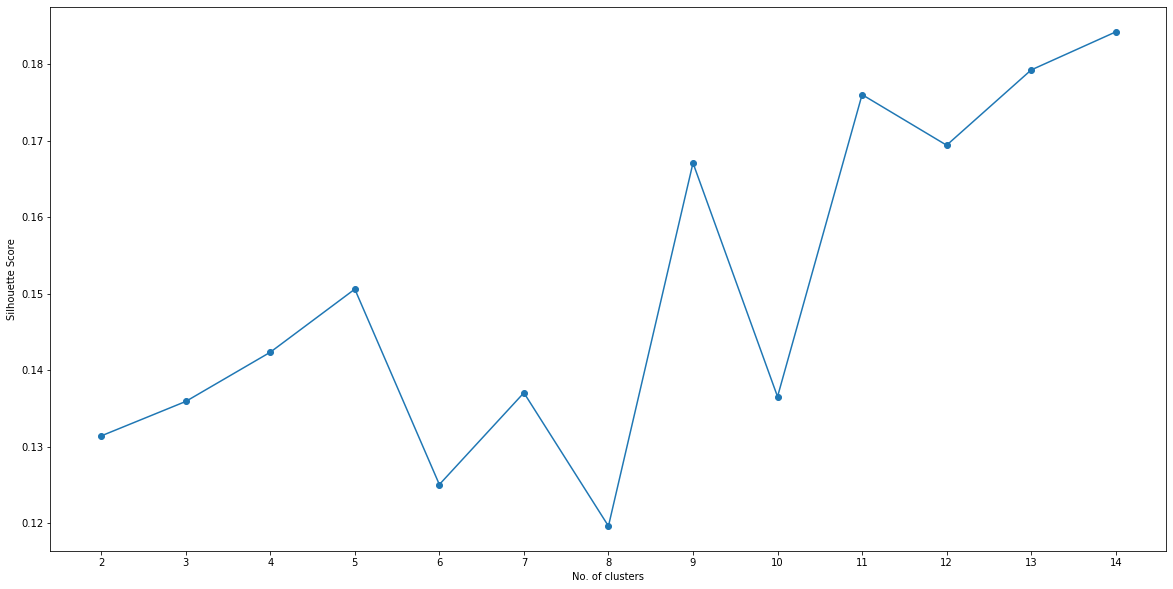

In [94]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

### From the graph the optimal number is found to be 8 using the Elbow Method.


In [95]:
opt_value = 8

### Now that we have calculated out optimum value of clusters, we can proceed with K-Means clustering.

In [96]:
man_clusters = opt_value

# Run k-means clustering
man_gc = man_grouped_clustering
kmeans = KMeans(n_clusters = man_clusters, init = 'k-means++', random_state = 0).fit(man_gc)

In [97]:
# Add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

### Now we will crate a final version of dataframe containing all the necessary data.


In [98]:
man_final = man_data
man_final = man_final.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')
man_final.dropna(inplace = True)
man_final['Cluster Labels'] = man_final['Cluster Labels'].astype(int)
man_final.head()

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,53.399090,-2.285610,2,Tram Station,Supermarket,Hardware Store,Golf Course,Bowling Green,Monument / Landmark,Park,Clothing Store,Fast Food Restaurant,Coffee Shop
1,Barlow Moor,53.422164,-2.245970,3,Pub,Italian Restaurant,Bar,Indian Restaurant,Deli / Bodega,Pizza Place,Liquor Store,Restaurant,Persian Restaurant,Supermarket
2,"Belle Vue, Manchester",42.955859,-71.459019,5,Donut Shop,Construction & Landscaping,Intersection,Business Service,Duty-free Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Event Service
3,Benchill,53.381730,-2.261250,2,Tram Station,Fast Food Restaurant,Discount Store,Bus Station,Supermarket,Tanning Salon,Sandwich Place,Bakery,Fish & Chips Shop,Market
4,"Beswick, Manchester",53.478390,-2.200320,4,Track Stadium,Athletics & Sports,Sporting Goods Shop,Tram Station,Fish & Chips Shop,Soccer Stadium,Soccer Field,Lounge,Event Space,Bus Stop


### In the next step we will visualize the clusters using Folium.

In [99]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Setup color scheme for different clusters
x = np.arange(man_clusters)
ys = [i + x + (i*x)**2 for i in range(man_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(man_final['Latitude'], man_final['Longitude'], man_final['Neighbourhood'], 
                                  man_final['Cluster Labels']):
    label = folium.Popup(str(poi) + ' (Cluster ' + str(cluster + 1) + ')', parse_html=True)
    map_clusters.add_child(
        folium.features.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7))
       
map_clusters

### Now lets have a look at all four clusters.

In [100]:
val = 1
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Brooklands (Manchester ward),Bar,Italian Restaurant,Asian Restaurant,Restaurant,Steakhouse,Beer Bar,Café,Seafood Restaurant,Pub,Lebanese Restaurant
11,Castlefield,Restaurant,Bar,Pub,Hotel,Indian Restaurant,Science Museum,Steakhouse,Cocktail Bar,Hostel,Spanish Restaurant
13,Chorlton (ward),Bar,Pizza Place,Pub,Café,Deli / Bodega,Tapas Restaurant,Thai Restaurant,Spanish Restaurant,Fish Market,Liquor Store
15,Chorlton-cum-Hardy,Bar,Pizza Place,Pub,Café,Deli / Bodega,Tapas Restaurant,Thai Restaurant,Spanish Restaurant,Fish Market,Liquor Store
16,Chorlton-on-Medlock,Bar,Pizza Place,Pub,Café,Deli / Bodega,Tapas Restaurant,Thai Restaurant,Spanish Restaurant,Fish Market,Liquor Store
17,Chorltonville,Bar,Pizza Place,Pub,Café,Deli / Bodega,Tapas Restaurant,Thai Restaurant,Spanish Restaurant,Fish Market,Liquor Store
35,Hulme,Pub,Café,Bar,Hotel,Coffee Shop,Indian Restaurant,Brewery,Beer Bar,Concert Hall,Pop-Up Shop
43,Manchester city centre,Pub,Café,Bar,Tea Room,Arts & Crafts Store,Coffee Shop,Record Shop,Donut Shop,Food Court,Beer Store
47,Mossley (ward),Bar,Sports Club,Miscellaneous Shop,Pub,Indian Restaurant,Grocery Store,Train Station,Canal Lock,Farmers Market,Falafel Restaurant
49,New Islington,Coffee Shop,Bar,Beer Bar,Pub,Brewery,Convenience Store,Bakery,Brazilian Restaurant,Cocktail Bar,Arts & Crafts Store


In [101]:
val = 2
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Blackley,Hotel,Supermarket,Sandwich Place,Furniture / Home Store,Gym / Fitness Center,Flea Market,Park,Shopping Mall,Event Space,Event Service
7,"Bradford, Manchester",Hotel,Supermarket,Flea Market,Gym / Fitness Center,Massage Studio,Park,Shopping Mall,Sandwich Place,Yoga Studio,Duty-free Shop
28,"Glenbrook, Greater Manchester",Hotel,Park,Light Rail Station,Pub,Supermarket,Golf Course,Discount Store,Falafel Restaurant,Event Space,Event Service
29,Gorton,Train Station,Gym / Fitness Center,Hotel,Park,Soccer Stadium,Fast Food Restaurant,Bus Station,Market,Sandwich Place,Go Kart Track
33,Harpurhey,Hotel,Supermarket,Flea Market,Gym / Fitness Center,Massage Studio,Park,Shopping Mall,Sandwich Place,Yoga Studio,Duty-free Shop
48,"Moston, Manchester",Hotel,Supermarket,Sandwich Place,Flea Market,Gym / Fitness Center,Park,Shopping Mall,Donut Shop,Event Space,Event Service
70,West Gorton,Train Station,Gym / Fitness Center,Hotel,Park,Soccer Stadium,Fast Food Restaurant,Bus Station,Market,Sandwich Place,Go Kart Track
73,Woodhouse Park,Train Station,Gym / Fitness Center,Soccer Stadium,Sandwich Place,Fast Food Restaurant,Hotel,Bus Station,Market,Go Kart Track,Park


In [102]:
val = 3
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Baguley,Tram Station,Supermarket,Hardware Store,Golf Course,Bowling Green,Monument / Landmark,Park,Clothing Store,Fast Food Restaurant,Coffee Shop
3,Benchill,Tram Station,Fast Food Restaurant,Discount Store,Bus Station,Supermarket,Tanning Salon,Sandwich Place,Bakery,Fish & Chips Shop,Market
18,"Clayton, Manchester",Supermarket,Tram Station,Discount Store,Fast Food Restaurant,Shopping Mall,Clothing Store,Pub,Park,Sandwich Place,Bus Stop
20,Crumpsall,Coffee Shop,Bakery,Pizza Place,Sandwich Place,Supermarket,Tram Station,Asian Restaurant,Park,Falafel Restaurant,Event Space
50,New Moston,Supermarket,Coffee Shop,Malay Restaurant,Fast Food Restaurant,Pizza Place,Hardware Store,Hotel,Tram Station,Train Station,Convenience Store
52,Newton Heath,Supermarket,Fast Food Restaurant,Tram Station,Bus Stop,Park,Shoe Store,Duty-free Shop,Farmers Market,Falafel Restaurant,Event Space
59,"Peel Hall, Wythenshawe",Tram Station,Fast Food Restaurant,Home Service,Discount Store,Market,Supermarket,Tanning Salon,Bakery,Fish & Chips Shop,Warehouse Store


In [103]:
val = 4
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barlow Moor,Pub,Italian Restaurant,Bar,Indian Restaurant,Deli / Bodega,Pizza Place,Liquor Store,Restaurant,Persian Restaurant,Supermarket
9,Burnage,Pub,Bar,Park,Coffee Shop,Dessert Shop,Rental Car Location,Restaurant,Sandwich Place,Burger Joint,Bistro
10,Burnage (ward),Pub,Bar,Park,Coffee Shop,Dessert Shop,Rental Car Location,Restaurant,Sandwich Place,Burger Joint,Bistro
12,"Cheetham, Manchester",Coffee Shop,Pub,Italian Restaurant,Brewery,Bar,Gym / Fitness Center,Park,Department Store,Music Venue,Museum
24,Didsbury,Italian Restaurant,Park,Pub,Grocery Store,Indian Restaurant,Deli / Bodega,Bar,Fish & Chips Shop,Burger Joint,Cheese Shop
25,Didsbury East (ward),Hotel,Pub,Coffee Shop,Café,Park,Bus Station,Casino,Rugby Pitch,Bowling Alley,Movie Theater
26,Didsbury West (ward),Italian Restaurant,Park,Pub,Grocery Store,Indian Restaurant,Deli / Bodega,Bar,Fish & Chips Shop,Burger Joint,Cheese Shop
27,Fallowfield,Pub,Gym / Fitness Center,Asian Restaurant,Fish & Chips Shop,Chinese Restaurant,Park,Bed & Breakfast,Bar,Greek Restaurant,Portuguese Restaurant
30,Great Heaton,Hotel,Pub,Italian Restaurant,Carpet Store,Park,Yoga Studio,Duty-free Shop,Farmers Market,Falafel Restaurant,Event Space
31,Green Quarter,Pub,Coffee Shop,Bar,Italian Restaurant,Brewery,Café,Burger Joint,Speakeasy,Food Court,Bike Shop


In [104]:
val = 5
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Beswick, Manchester",Track Stadium,Athletics & Sports,Sporting Goods Shop,Tram Station,Fish & Chips Shop,Soccer Stadium,Soccer Field,Lounge,Event Space,Bus Stop
6,Bradford-with-Beswick,Track Stadium,Athletics & Sports,Sporting Goods Shop,Tram Station,Fish & Chips Shop,Soccer Stadium,Soccer Field,Lounge,Event Space,Bus Stop
14,Chorlton Park (ward),Grocery Store,Park,Pizza Place,Indian Restaurant,Tram Station,Music Venue,Restaurant,Pub,Coffee Shop,Cosmetics Shop
19,Collyhurst,Clothing Store,Fast Food Restaurant,Coffee Shop,Grocery Store,Mobile Phone Shop,Brewery,Soccer Field,Shopping Plaza,Men's Store,Sandwich Place
32,"Greenheys, Manchester",Music Venue,Café,Chinese Restaurant,Bar,Pub,Supermarket,Park,Fast Food Restaurant,Burger Joint,Lounge
34,Highfield Country Park,Gym,Fast Food Restaurant,Grocery Store,Chinese Restaurant,Shopping Mall,English Restaurant,Supermarket,Furniture / Home Store,Bar,Pizza Place
36,Hyde Godley (ward),Pizza Place,Hotel,Supermarket,Sandwich Place,Soccer Field,Event Service,Grocery Store,Dance Studio,Train Station,Indian Restaurant
38,Hyde Werneth (ward),Home Service,Pub,Supermarket,Gym Pool,Grocery Store,Donut Shop,Farmers Market,Falafel Restaurant,Event Space,Event Service
39,Ladybarn,Fast Food Restaurant,Park,Grocery Store,Supermarket,Pub,Indian Restaurant,Cocktail Bar,Bus Station,Sandwich Place,Fish & Chips Shop
40,Levenshulme,Grocery Store,Indian Restaurant,Café,Fast Food Restaurant,Park,Middle Eastern Restaurant,Bus Stop,Sandwich Place,Chinese Restaurant,Pub


In [105]:
val = 6
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Belle Vue, Manchester",Donut Shop,Construction & Landscaping,Intersection,Business Service,Duty-free Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space,Event Service


In [106]:
val = 7
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Longdendale (ward),Pub,Construction & Landscaping,Convenience Store,Cricket Ground,Electronics Store,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [107]:
val = 8
man_final.loc[man_final['Cluster Labels'] == (val - 1), man_final.columns[[0] + np.arange(4, man_final.shape[1]).tolist()]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Denton North East (ward),Supermarket,Pizza Place,Gym Pool,Pharmacy,Mobile Phone Shop,Coffee Shop,Clothing Store,Shopping Plaza,Outlet Store,Sporting Goods Shop
22,Denton South (ward),Supermarket,Pizza Place,Gym Pool,Pharmacy,Mobile Phone Shop,Coffee Shop,Clothing Store,Shopping Plaza,Outlet Store,Sporting Goods Shop
23,Denton West (ward),Supermarket,Pizza Place,Gym Pool,Pharmacy,Mobile Phone Shop,Coffee Shop,Clothing Store,Shopping Plaza,Outlet Store,Sporting Goods Shop
67,Stalybridge South (ward),Supermarket,Pharmacy,Café,Gym Pool,Pizza Place,Mobile Phone Shop,Coffee Shop,Shopping Plaza,Clothing Store,Outlet Store


### After studying all four clusters, it is recommended to the client that neighbourhoods such as Barlow Moor, Brookelands and Hyde Newton(Ward) that fall in cluster 4 look like good locations for starting a restaurant. The client can go ahead and make a decision depending on othr factors like availability and legal requirements that are out of scope of this project.